# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [85]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [86]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        
        #convert Kelvin to Celsius
        city_max_temp = city_weather['main']['temp_max'] - 273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | vilyuchinsk
Processing Record 3 of Set 1 | coquimbo
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | heroica guaymas
Processing Record 6 of Set 1 | tyukhtet
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | gillette
Processing Record 9 of Set 1 | sur
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | utrik
Processing Record 12 of Set 1 | kouroussa
Processing Record 13 of Set 1 | moundou
Processing Record 14 of Set 1 | mejit
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | chonchi
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | kenai
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | port mathurin
Processing Record 23 of

City not found. Skipping...
Processing Record 41 of Set 4 | howrah
Processing Record 42 of Set 4 | college
Processing Record 43 of Set 4 | bairnsdale
Processing Record 44 of Set 4 | makokou
Processing Record 45 of Set 4 | jamestown
Processing Record 46 of Set 4 | mugia
Processing Record 47 of Set 4 | tsawwassen
Processing Record 48 of Set 4 | chibougamau
Processing Record 49 of Set 4 | polyarnyy
Processing Record 0 of Set 5 | olovyannaya
Processing Record 1 of Set 5 | batticaloa
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | mount pearl
Processing Record 4 of Set 5 | vigan
Processing Record 5 of Set 5 | afaahiti
Processing Record 6 of Set 5 | raduzhnyy
Processing Record 7 of Set 5 | nuku'alofa
Processing Record 8 of Set 5 | dunedin
Processing Record 9 of Set 5 | brookings
Processing Record 10 of Set 5 | kamwenge
Processing Record 11 of Set 5 | stornoway
Processing Record 12 of Set 5 | yurimaguas
Processing Record 13 of Set 5 | ghat
Processing Record 14 of Set

Processing Record 29 of Set 8 | ghadamis
Processing Record 30 of Set 8 | valera
Processing Record 31 of Set 8 | tongliao
Processing Record 32 of Set 8 | launceston
Processing Record 33 of Set 8 | peniche
Processing Record 34 of Set 8 | boca suno
Processing Record 35 of Set 8 | el jadid
Processing Record 36 of Set 8 | aasiaat
Processing Record 37 of Set 8 | hit
Processing Record 38 of Set 8 | helena valley west central
Processing Record 39 of Set 8 | tralee
Processing Record 40 of Set 8 | alice
Processing Record 41 of Set 8 | ribeira brava
Processing Record 42 of Set 8 | nelson
Processing Record 43 of Set 8 | mahabe
City not found. Skipping...
Processing Record 44 of Set 8 | keetmanshoop
Processing Record 45 of Set 8 | qui nhon
Processing Record 46 of Set 8 | savelugu
Processing Record 47 of Set 8 | lihue
Processing Record 48 of Set 8 | zaqatala
Processing Record 49 of Set 8 | komsomolsk-on-amur
Processing Record 0 of Set 9 | borogontsy
Processing Record 1 of Set 9 | ximeicun
Processing

Processing Record 17 of Set 12 | panagyurishte
Processing Record 18 of Set 12 | calvi
Processing Record 19 of Set 12 | karystos
Processing Record 20 of Set 12 | tombodu
Processing Record 21 of Set 12 | dogondoutchi
Processing Record 22 of Set 12 | horta
Processing Record 23 of Set 12 | al bardiyah
Processing Record 24 of Set 12 | eraniel
Processing Record 25 of Set 12 | kapa'a
Processing Record 26 of Set 12 | marang
Processing Record 27 of Set 12 | tulun
Processing Record 28 of Set 12 | antsirabe afovoany
City not found. Skipping...
Processing Record 29 of Set 12 | margate
Processing Record 30 of Set 12 | port hueneme
Processing Record 31 of Set 12 | benguela
Processing Record 32 of Set 12 | vernon
Processing Record 33 of Set 12 | nouadhibou
Processing Record 34 of Set 12 | nushki
Processing Record 35 of Set 12 | lensk
Processing Record 36 of Set 12 | patnos
Processing Record 37 of Set 12 | muroto-misakicho
Processing Record 38 of Set 12 | sao joao da barra
Processing Record 39 of Set 

In [87]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [88]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.82,95,100,17.09,TF,1690165897
1,vilyuchinsk,52.9306,158.4028,25.15,61,55,6.86,RU,1690166284
2,coquimbo,-29.9533,-71.3436,13.85,88,0,2.06,CL,1690165942
3,papatowai,-46.5619,169.4708,9.63,87,93,0.97,NZ,1690166284
4,heroica guaymas,27.9333,-110.9000,32.65,62,20,7.20,MX,1690166285


In [89]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [90]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.82,95,100,17.09,TF,1690165897
1,vilyuchinsk,52.9306,158.4028,25.15,61,55,6.86,RU,1690166284
2,coquimbo,-29.9533,-71.3436,13.85,88,0,2.06,CL,1690165942
3,papatowai,-46.5619,169.4708,9.63,87,93,0.97,NZ,1690166284
4,heroica guaymas,27.9333,-110.9000,32.65,62,20,7.20,MX,1690166285


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

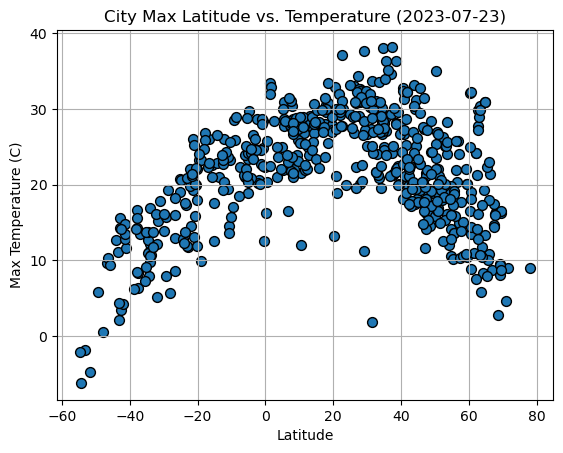

In [91]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', 
                  x='Lat', 
                  y='Max Temp',
                  xlabel='Latitude', 
                  ylabel='Max Temperature (C)',
                  title=f"City Max Latitude vs. Temperature ({datetime.date.today().strftime('%Y-%m-%d')})",
                  edgecolors='black',
                  s=50
                 )

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

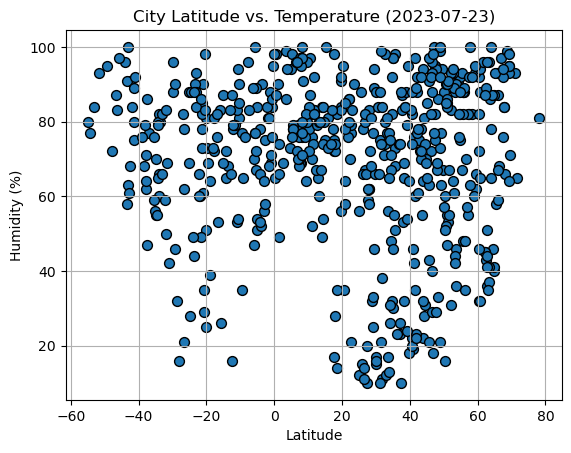

In [92]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', 
                  x='Lat', 
                  y='Humidity',
                  xlabel='Latitude', 
                  ylabel='Humidity (%)',
                  title=f"City Latitude vs. Temperature ({datetime.date.today().strftime('%Y-%m-%d')})",
                  edgecolors='black',
                  s=50
                 )

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

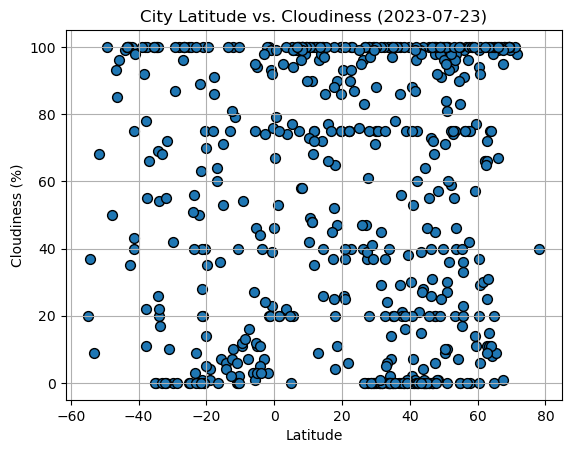

In [93]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', 
                  x='Lat', 
                  y='Cloudiness',
                  xlabel='Latitude', 
                  ylabel='Cloudiness (%)',
                  title=f"City Latitude vs. Cloudiness ({datetime.date.today().strftime('%Y-%m-%d')})",
                  edgecolors='black',
                  s=50
                 )

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

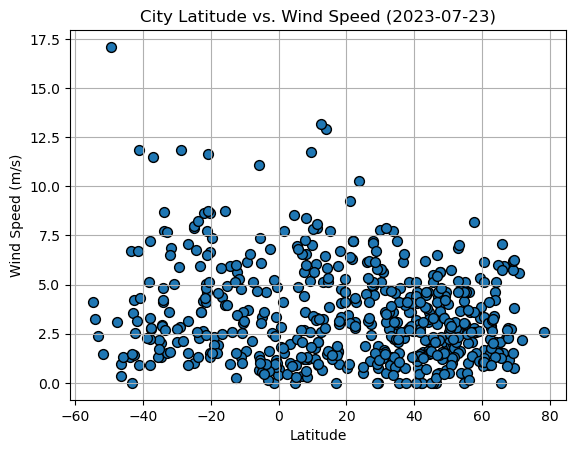

In [94]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', 
                  x='Lat', 
                  y='Wind Speed',
                  xlabel='Latitude', 
                  ylabel='Wind Speed (m/s)',
                  title=f"City Latitude vs. Wind Speed ({datetime.date.today().strftime('%Y-%m-%d')})",
                  edgecolors='black',
                  s=50
                 )

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [116]:
# Define a function to create Linear Regression plots
def linearRegression(df, x, y, xAnno, yAnno, xlabel, ylabel, figureNumber, title):#, xlabel, ylabel, title):
    (m, yIntercept, r, p, std) = linregress(df[x], df[y])
    linStr = f'y = {m:.2f}x + {yIntercept:.2f}'
    yLineValues = m * df[x] + yIntercept
    
    print(f'The r-value is: {r}')
    
    df.plot(kind='scatter', 
              x= x, 
              y= y,
              xlabel=xlabel,
              ylabel=ylabel,
              title= title,
              s=50
             )

    # Incorporate the other graph properties
    plt.plot(df[x], yLineValues, color='red')
    plt.annotate(linStr, (xAnno, yAnno), color = 'red', fontsize=14)

    # Save the figure
    plt.savefig(f"output_data/Fig{figureNumber}.png")

    # Show plot
    plt.show()

In [117]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vilyuchinsk,52.9306,158.4028,25.15,61,55,6.86,RU,1690166284
4,heroica guaymas,27.9333,-110.9000,32.65,62,20,7.20,MX,1690166285
5,tyukhtet,56.5389,89.3011,20.27,70,100,3.62,RU,1690166286
6,ribeira grande,38.5167,-28.7000,22.10,84,16,2.68,PT,1690166286
7,gillette,44.2911,-105.5022,29.97,28,0,3.60,US,1690166286


In [118]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.82,95,100,17.09,TF,1690165897
2,coquimbo,-29.9533,-71.3436,13.85,88,0,2.06,CL,1690165942
3,papatowai,-46.5619,169.4708,9.63,87,93,0.97,NZ,1690166284
9,waitangi,-43.9535,-176.5597,12.68,96,99,1.34,NZ,1690165884
14,port elizabeth,-33.9180,25.5701,12.16,66,20,7.72,ZA,1690165878


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5328790347287595


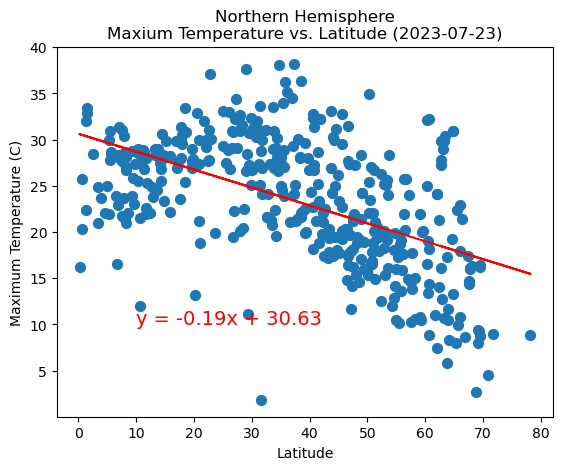

In [119]:
# Linear regression on Northern Hemisphere
linregdata = linearRegression(northern_hemi_df, 'Lat', 'Max Temp', 10, 10,  'Latitude', 'Maximum Temperature (C)', 5, f"Northern Hemisphere\nMaxium Temperature vs. Latitude ({datetime.date.today().strftime('%Y-%m-%d')})")



The r-value is: 0.8064687702613977


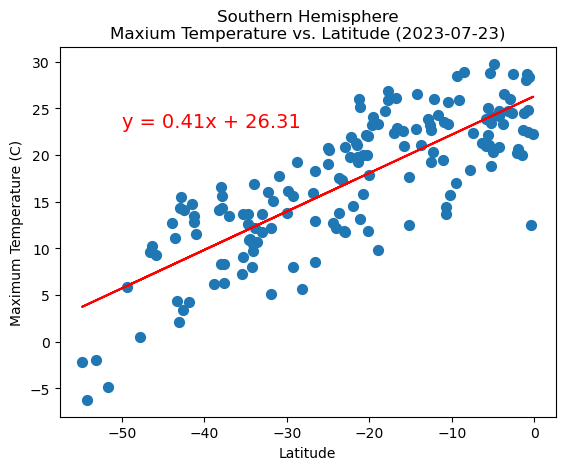

In [121]:
# Linear regression on Southern Hemisphere
linregdata = linearRegression(southern_hemi_df, 'Lat', 'Max Temp', -50, 23, 'Latitude', 'Maximum Temperature (C)', 6, f"Southern Hemisphere\nMaxium Temperature vs. Latitude ({datetime.date.today().strftime('%Y-%m-%d')})")

**Discussion about the linear relationship:** 

### Pearson's R Coefficient:
In the northern hemisphere, Pearson's R coefficient is -0.53 which shows that there is a negative correlation between maximum temperature and latitude. And in the southern hemisphere, Pearson's R coefficient is 0.81 which shows that there is a positive correlation between between maximum temperature and latitude. This corresponds quite well with our basic intuition that the further one gets from the equator, the cooler the maximum temperature is (i.e. the higher the absolute value of latitude the cooler the climate). 

### Celsius To Latitude Rate Of Change:
Interestingly (but not too surprising), the northern hemisphere has a -0.19&#176;C/&#176;Lat rate of change (see Figure 5 "Northern Hemisphere Maxium Temperature vs. Latitude (2023-07-23)") whereas the southern hemisphere has a 0.41&#176;C/&#176;Lat rate of change (see Figure 6 "Southern Hemisphere Maxium Temperature vs. Latitude (2023-07-23)") which is approximately 115% higher in absolute value. This is likely due to the fact that the northern hemisphere has many cities between 0&#176;Lat and about 25&#176;Lat that are covered in clouds today (see Figure 3 "City Latitude vs. Cloudiness (2023-07-23)") and therby, lowering the maximum temperature close to the equator in the northern hemisphere as can be seen in Figure 5.

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE